# Quantium Customer Analytics (Forage Virtual Experience Program)

## QUESTION AND PROBLEM DEFINITION

**Question - What types of customers who purchase Chips and their purchasing behaviour within the region?**
To answer this question, we need to complete the following tasks:
* Examing transaction dataset and customer dataset;
* Analyzing the metrics;
* Determing which segments we should be targeting.

# LOAD PACKAGES

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import re
import xlrd
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

# Filter all warnings. 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ACQUIRE DATA

We start by acquiring the transaction and customer datasets into Pandas dataframes.

In [2]:
# Open the local files
from google.colab import files
uploaded = files.upload()

Saving QVI_purchase_behaviour.csv to QVI_purchase_behaviour.csv
Saving QVI_transaction_data.csv to QVI_transaction_data.csv


In [3]:
# Load local files as pandas dataframe
transaction = pd.read_csv(r'QVI_transaction_data.csv')
customer =  pd.read_csv(r'QVI_purchase_behaviour.csv')

# ANALYZE BY DESCRIBING DATA

Pandas also helps describe the datasets answering following questions early in the project.

**Which features are avaiable in the dataset?**

Noting the feature names for directly manipulating or analyzing these. These feature names are followed:

In [4]:
print('Feature names in transaction dataset are',transaction.columns.values)
print('Feature names in customer dataset are',customer.columns.values)

Feature names in transaction dataset are ['DATE' 'STORE_NBR' 'LYLTY_CARD_NBR' 'TXN_ID' 'PROD_NBR' 'PROD_NAME'
 'PROD_QTY' 'TOT_SALES']
Feature names in customer dataset are ['LYLTY_CARD_NBR' 'LIFESTAGE' 'PREMIUM_CUSTOMER']


Let's preview the data.

In [5]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


**What are the data types for various features?**

Helping us during converting goal.
* Integer or float: seven features in transaction dataset and one feature in customer dataset;
* String(object): one feature in transaction dataset and two features in customer dataset.

In [7]:
transaction.info()
print('-'*40) # Draw the seperate line
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-n

**Which features are categorical?**

This helps us select the appropriate plot for visualization.
* Categorical: STORE_NBR, LYLTY_CARD_NBR, PROD_NBR, LIFESTAGE;
* Ordinal: PREMIUM_CUSTOMER (Maybe).

**Which features are numerical?**

This helps us select the appropraite plots for visualization.
* Continuous: TOT_SALES;
* Discrete:  PROD_QTY.

**Which features are mixed data types?**

These are candidates for correcting goal.
* Alphanumeric: PROD_NAME.

**What are the distributions of numerical features?**

This helps us understand the important statistics for each numerical feature.

In [8]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


* PROD_QTY did not vary significantly, but few customers bought large amount (200) of products;

In [9]:
transaction['PROD_QTY'].describe(percentiles=[.8,.99])

count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
50%           2.000000
80%           2.000000
99%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

* TOT_SALES are mainly within the range of 1.5 and 13.00, but high value sales do exist in the transaction dataset.

In [10]:
transaction['TOT_SALES'].describe(percentiles=[.8,.99])

count    264836.000000
mean          7.304200
std           3.083226
min           1.500000
50%           7.400000
80%           9.200000
99%          13.000000
max         650.000000
Name: TOT_SALES, dtype: float64

**What are the distribution of categorical features?**

* There are 114 different products in the transaction dataset and Kettle Mozzarella Basil & Pesto 175g has the highest sales.

In [ ]:
transaction.describe(include=['O'])

,PROD_NAME
count,264836
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


* LIFESTAGE has seven unique values and RETIREES are the major type among all types in LIFESTAGE feature;
* PREMIUM_CUSTOMER has three unique values and Mainstream are the major type among all types in PREMIUM_CUSTOMER feature.

In [ ]:
customer.describe(include=['O'])

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

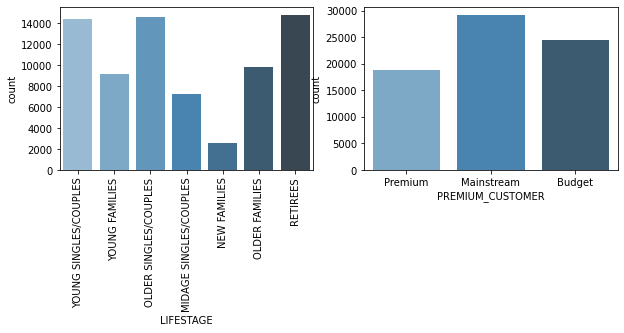

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot(x='LIFESTAGE',data=customer,palette='Blues_d')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x='PREMIUM_CUSTOMER',data=customer,palette='Blues_d')
plt.xticks(rotation=0)

STORE_NBR is also a categorical feature, but we will convert it into discrete numbers in the DATA WRANGLE section and then check its distribution.



**Which features may contain errors or typos?**

PROD_NAME feature may contain errors or typos as there are several ways used to describe a name.

In [ ]:
transaction['PROD_NAME'].head(20)

0       Natural Chip        Compny SeaSalt175g
1                     CCs Nacho Cheese    175g
2       Smiths Crinkle Cut  Chips Chicken 170g
3       Smiths Chip Thinly  S/Cream&Onion 175g
4     Kettle Tortilla ChpsHny&Jlpno Chili 150g
5     Old El Paso Salsa   Dip Tomato Mild 300g
6     Smiths Crinkle Chips Salt & Vinegar 330g
7        Grain Waves         Sweet Chilli 210g
8      Doritos Corn Chip Mexican Jalapeno 150g
9        Grain Waves Sour    Cream&Chives 210G
10    Smiths Crinkle Chips Salt & Vinegar 330g
11       Kettle Sensations   Siracha Lime 150g
12                    Twisties Cheese     270g
13            WW Crinkle Cut      Chicken 175g
14              Thins Chips Light&  Tangy 175g
15                           CCs Original 175g
16                           Burger Rings 220g
17      NCC Sour Cream &    Garden Chives 175g
18     Doritos Corn Chip Southern Chicken 150g
19                    Cheezels Cheese Box 125g
Name: PROD_NAME, dtype: object

**Which features contain blank, null or empty values?**

There're no missing values in both transaction and customer datasets.

In [ ]:
# Check for nulls for the transaction dataset
null_check_transaction = transaction.isnull().sum()
null_check_transaction

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [ ]:
# Check for nulls for the customer dataset
null_check_customer = customer.isnull().sum()
null_check_customer

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

However, there's only 364 unique dates which indicates a missing date. 

In [ ]:
# Check the number of transaction by data
transaction['DATE'].nunique()

364

# DECISIONS BASED ON DATA ANALYSIS

We arrive at following decisions based on data analysis so far. 

**Correcting**

We want to remain only products in chips in the transaction dataset.

**Creating**
1. We want to engineer the PROD_NAME feature to extract packet sizes;
2. We want to engineer the PROD_NAME feature to extract brand names.

**Converting**

We want to convert the format of DATE into a human readable format.

**Correlating**

We want to know how well each feature correlates with TOT_SALES, especially LIFESTAGE and PREMIUM_CUSTOMER features.

# WRANGLE DATA

So far we did not change a single feature or value to arrive at these. Let's now execute our decisions



### Correcting by dropping the irrelavant observations

We are only interested in the chips category, so let's remove salsa products in the transaction dataset.

In [11]:
transaction.shape

(264836, 8)

In [13]:
transaction = transaction.drop(transaction[transaction['PROD_NAME'].str.contains('Salsa')].index)
transaction[transaction['PROD_NAME'].str.contains('Salsa')]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [15]:
transaction.shape

(246742, 8)

### Creating a new feature from the existing one

In the following code, we extract PackSize feature using regular expressions. The RegEx pattern `\d+` matches the first digit which ends with digits within PROD_NAME feature. 

In [16]:
productname = transaction['PROD_NAME'].tolist()
packsize=[]
for i in range(0,len(transaction)):
  packsize.append(re.findall(r'\d+',productname[i]))

result = []
for i in packsize:
  result.append(int(i[0]))

transaction['PackSize'] = result

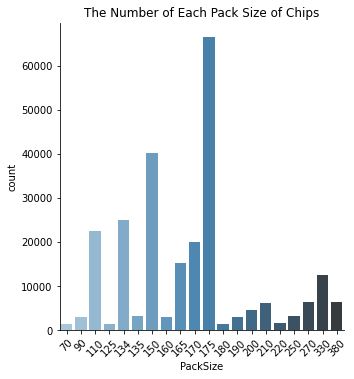

In [17]:
sns.catplot(x='PackSize',kind='count', data=transaction,palette="Blues_d").set(title="The Number of Each Pack Size of Chips")
plt.xticks(rotation=45)
plt.show()

### Creating a new feature from the existing feature

In the following code, we extract Brand feature using split() function. 

In [18]:
brand=[]
for i in range(0,len(transaction)):
  brand.append(productname[i].split()[0])

transaction['Brand'] = brand

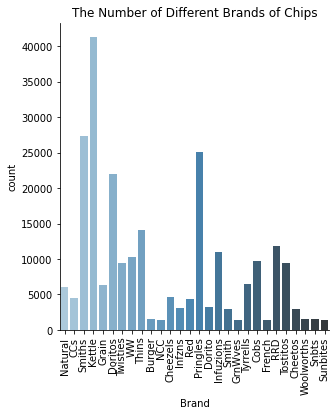

In [19]:
sns.catplot(x='Brand',kind='count', data=transaction,palette="Blues_d").set(title="The Number of Different Brands of Chips")
plt.xticks(rotation=90)
plt.show()

Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips. Let's combine them together.

In [20]:
transaction['Brand']=transaction['Brand'].replace('RED','RRD')
transaction['Brand']=transaction['Brand'].replace('Red','RRD')
transaction['Brand']=transaction['Brand'].replace('Natural','NNC')
transaction['Brand']=transaction['Brand'].replace('Dorito','Doritos')
transaction['Brand']=transaction['Brand'].replace('Infuzions','Infzns')
transaction['Brand']=transaction['Brand'].replace('Smith','Smiths')
transaction['Brand']=transaction['Brand'].replace('Sunbites','Snbts')
transaction['Brand']=transaction['Brand'].replace('Woolworths','WW')
transaction['Brand']=transaction['Brand'].replace('Grain','GrnWves')

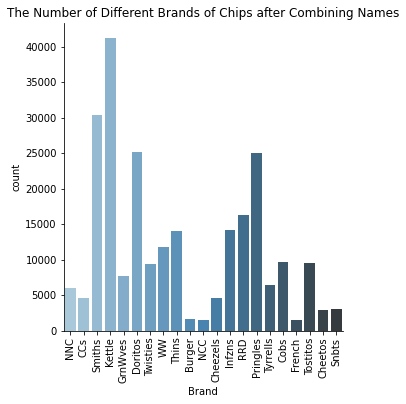

In [21]:
sns.catplot(x='Brand',kind='count', data=transaction,palette="Blues_d").set(title="The Number of Different Brands of Chips after Combining Names")
plt.xticks(rotation=90)
plt.show()

### Converting a Excel date feature

Let's convert the Excel date feature into human readable format and then find the missing date in the transaction year.

In [22]:
# Convert the DATE feature from Excel date format to human readable format
dates = []
for date in transaction['DATE']:
  dates.append(xlrd.xldate_as_datetime(date,0).date().isoformat())

transaction['DATE'] = dates

We can see that the increase in sales occurs in the lead-up to Christmas and that there were zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

In [23]:
# Check the missing date
df = transaction[['DATE','TOT_SALES']]
df = df.set_index('DATE')
df.index = pd.to_datetime(df.index)
pd.date_range(start='2018-07-01',end='2019-06-30').difference(df.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [24]:
# Create a new data frame which contains the counts for each date
df_date1 = pd.DataFrame(pd.date_range(start='2018-07-01',end='2019-06-30'),columns=['Date1'])
df_date2 = transaction['DATE'].groupby(transaction['DATE']).count().to_frame()
df_date2['Date2'] = pd.to_datetime(df_date2.index)
df_date2 = df_date2.rename(columns={'DATE':'Count'})
df_date = df_date1.merge(df_date2,how='left',left_on='Date1',right_on='Date2')

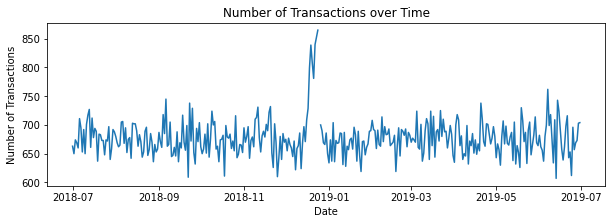

In [25]:
plt.figure(figsize=(10,3))
plt.plot(df_date['Date1'],df_date['Count'])
plt.title('Number of Transactions over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# ANALYZE BY VISUALIZING DATA

Now we can continue confirming some of our assumptions using visualizatoin for analyzing the data.

In [26]:
# Create a new dataframe, combine, to contain all information in both datasets
combine = transaction.merge(customer,how='left',left_on='LYLTY_CARD_NBR',right_on='LYLTY_CARD_NBR')

In [27]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 246741
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              246742 non-null  object 
 1   STORE_NBR         246742 non-null  int64  
 2   LYLTY_CARD_NBR    246742 non-null  int64  
 3   TXN_ID            246742 non-null  int64  
 4   PROD_NBR          246742 non-null  int64  
 5   PROD_NAME         246742 non-null  object 
 6   PROD_QTY          246742 non-null  int64  
 7   TOT_SALES         246742 non-null  float64
 8   PackSize          246742 non-null  int64  
 9   Brand             246742 non-null  object 
 10  LIFESTAGE         246742 non-null  object 
 11  PREMIUM_CUSTOMER  246742 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.5+ MB


**Correlating categorical features**

Let's start by understanding correlations between categorical features and our goal (TOT_SALES).

Sales are coming mainly from budget older family, mainstream young singles and couples, and mainsteam retirees.


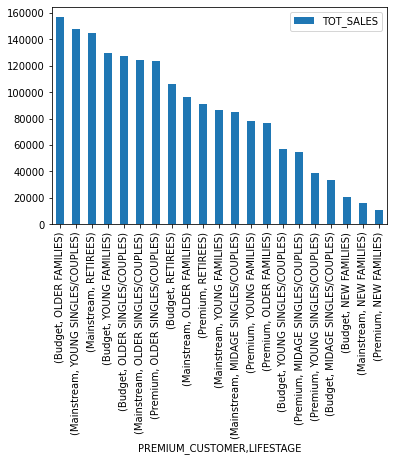

In [28]:
df_pls = combine[['TOT_SALES','PREMIUM_CUSTOMER','LIFESTAGE']]
df_pls_grouped = df_pls.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).agg({'TOT_SALES':'sum'}).sort_values('TOT_SALES',ascending=False)
df_pls_grouped.plot(kind='bar')

There are more mainstream young singles and couples and mainstream retirees who buy chips. Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this next.

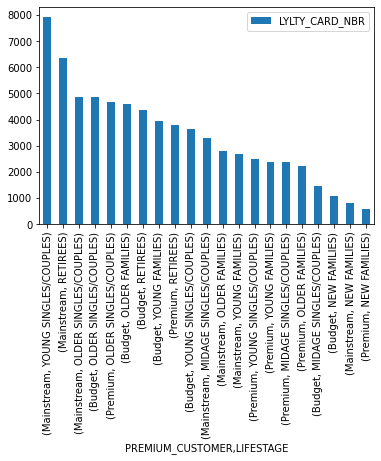

In [29]:
df_plcs = combine[['LYLTY_CARD_NBR','PREMIUM_CUSTOMER','LIFESTAGE']]
df_plcs_grouped = df_plcs.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).agg({'LYLTY_CARD_NBR':'nunique'}).sort_values('LYLTY_CARD_NBR',ascending=False)
df_plcs_grouped.plot(kind='bar')

Older families and young families in general buy more chips per customer. 

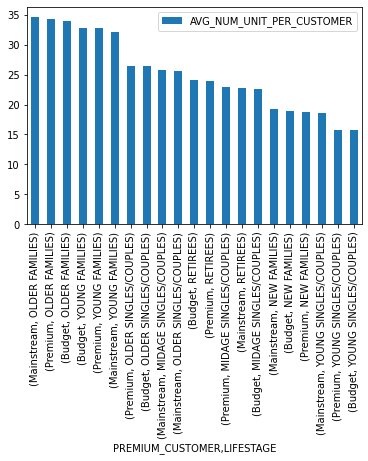

In [30]:
df_plc_grouped = df_pls_grouped.merge(df_plcs_grouped,how='left',left_index=True,right_index=True)
df_plc_grouped['AVG_NUM_UNIT_PER_CUSTOMER']=df_plc_grouped['TOT_SALES']/df_plc_grouped['LYLTY_CARD_NBR'] 
df_plc_grouped = df_plc_grouped.drop(['TOT_SALES','LYLTY_CARD_NBR'],axis=1).sort_values('AVG_NUM_UNIT_PER_CUSTOMER',ascending=False)
df_plc_grouped.plot(kind='bar')

Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

Mainstream young and midage singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.

This is also supported by there being fewer premium young and midage singles and couples buying chips compared to their mainstream counterparts.

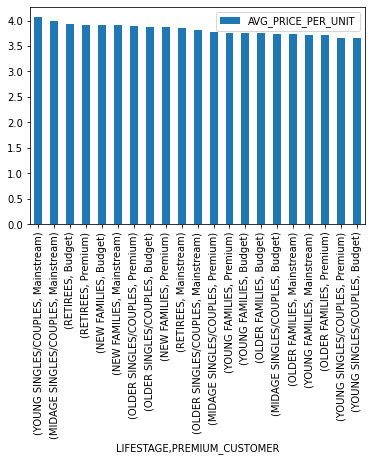

In [31]:
df_avg_price_per_unit = combine[['PREMIUM_CUSTOMER','LIFESTAGE','TOT_SALES','PROD_QTY']]
df_avg_price_per_unit['AVG_PRICE_PER_UNIT']=df_avg_price_per_unit['TOT_SALES']/df_avg_price_per_unit['PROD_QTY'] 
df_avg_price_per_unit_grouped=df_avg_price_per_unit.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'AVG_PRICE_PER_UNIT':'mean'}).sort_values('AVG_PRICE_PER_UNIT',ascending=False)
df_avg_price_per_unit_grouped.plot(kind='bar')

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [32]:
# Perform an independent t-test between mainstream vs premium and budget young and midage singles and couples
test1 = df_avg_price_per_unit[(df_avg_price_per_unit['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES','MIDAGE SINGLES/COUPLES'])) & (df_avg_price_per_unit['PREMIUM_CUSTOMER']=='Mainstream')]
test2 = df_avg_price_per_unit[(df_avg_price_per_unit['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES','MIDAGE SINGLES/COUPLES'])) & (df_avg_price_per_unit['PREMIUM_CUSTOMER']!='Mainstream')]
stats.ttest_ind(test1['AVG_PRICE_PER_UNIT'],test2['AVG_PRICE_PER_UNIT'])

Ttest_indResult(statistic=37.83196107667815, pvalue=2.235645611549355e-309)

The t-test results in a p-value closed to 0, i.e. the unit price for mainstream, young and midage singles and couples ARE significantly higher than that of budget or premium, young and midage singles and couples.

**More Findings in Target Customer**

We have found quite a few interesting insights that we can dive deep into. We might want to target customer segment that contribute the most to sales to retain the more further increase sales. Let's look at Mainstream, young singles and couples and find out if they tend to buy a particular brand of chips.

In [33]:
segment1 = combine[(combine['LIFESTAGE'] =='YOUNG SINGLES/COUPLES') & (combine['PREMIUM_CUSTOMER']=='Mainstream')]
other = combine[(combine['LIFESTAGE'] !='YOUNG SINGLES/COUPLES') & (combine['PREMIUM_CUSTOMER']!='Mainstream')]

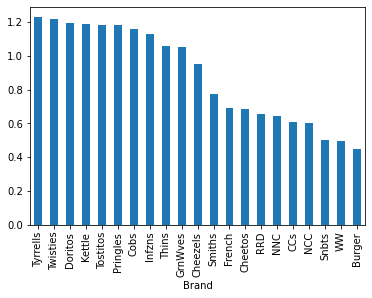

In [35]:
# Brand affinity compared to the rest of the population
quantity_segment1=segment1.agg({'PROD_QTY':'sum'})
quantity_other=other.agg({'PROD_QTY':'sum'})
quantity_segment1_by_brand = segment1.groupby(['Brand']).agg({'PROD_QTY':'sum'})/quantity_segment1
quantity_other_by_brand = other.groupby(['Brand']).agg({'PROD_QTY':'sum'})/quantity_other
brand_prop=quantity_segment1_by_brand.merge(quantity_other_by_brand,how='left',left_index=True,right_index=True)
brand_prop = brand_prop.rename(columns={'PROD_QTY_x':'targetSegment','PROD_QTY_y':'other'})
brand_prop['affinityBrand']=brand_prop['targetSegment']/brand_prop['other']
brand_prop = brand_prop.sort_values('affinityBrand',ascending=False)
brand_prop['affinityBrand'].plot(kind='bar')

We can see that:

* Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population;
* Mainstream young singles and couples are 56% less likely to purchase Burger Ringers compared to the rest of the population.



In [ ]:
print(brand_prop.head(1))
print(brand_prop.tail(1))

          targetSegment     other  affinityBrand
Brand                                           
Tyrrells       0.031553  0.025676       1.228888
        targetSegment     other  affinityBrand
Brand                                         
Burger       0.002926  0.006528       0.448254


At last, let's find out whether our target segment tends to buy larger packs of chips.

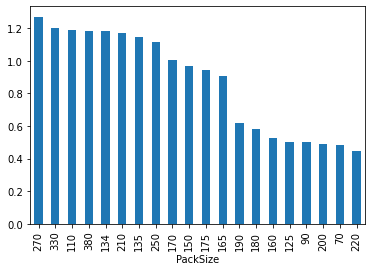

In [36]:
# Preferred pack size compared to the rest of the population
quantity_segment1_by_size = segment1.groupby(['PackSize']).agg({'PROD_QTY':'sum'})/quantity_segment1
quantity_other_by_size = other.groupby(['PackSize']).agg({'PROD_QTY':'sum'})/quantity_other
size_prop=quantity_segment1_by_size.merge(quantity_other_by_size,how='left',left_index=True,right_index=True)
size_prop = size_prop.rename(columns={'PROD_QTY_x':'targetSegment','PROD_QTY_y':'other'})
size_prop['affinitySize']=size_prop['targetSegment']/size_prop['other']
size_prop = size_prop.sort_values('affinitySize',ascending=False)
size_prop['affinitySize'].plot(kind='bar')

It looks like Mainstream young singles and couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population.

In [37]:
print(size_prop.head(1))

          targetSegment     other  affinitySize
PackSize                                       
270            0.031829  0.025032      1.271535


Let's check what brands sell this pack size.

In [38]:
combine[combine['PackSize']==270]['PROD_NAME'].unique()

array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

Twisties are the only brand offering 270g packs and so this may be reflecting a higher likelihood of purchasing Twisties for the target customers.